In [2]:
import numpy as np
import pickle
from TFHelp import *
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import seaborn as sb

In [4]:
delimiter = ","
#TFAVariable = [[float(y) for y in x.split(delimiter)] for x in open("TFVAResultSignConst.csv","r").readlines()]
#TFVARange = pickle.load(open("TFVAResultSignConstRange.pkl","rb"))
#TFVAQuality = pickle.load(open("TFVAResultSignConstQuality.pkl","rb"))
matrix = [[float(y) for y in x.split(delimiter)] for x in open("TFA_CSMatrices/learnedTFAvalSignConst.csv","r").readlines()]


Text(0.5,1,'TFA Matrix - TFVA Mean Matrix')

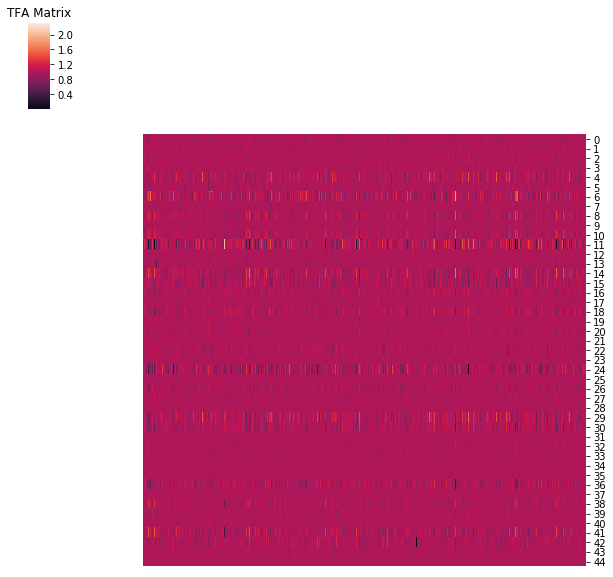

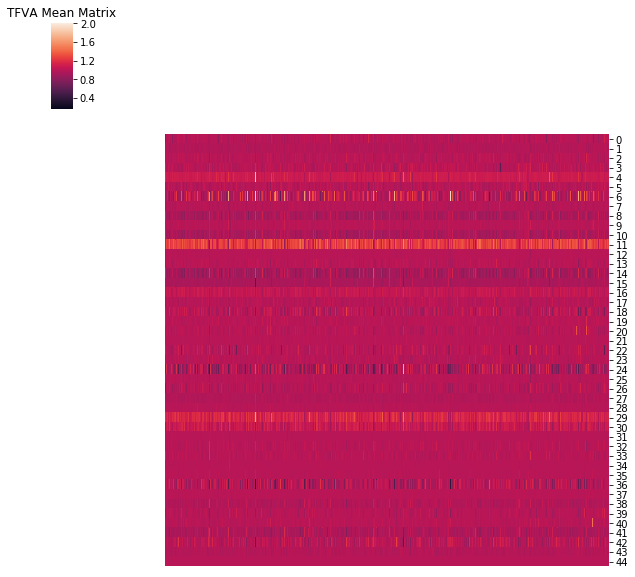

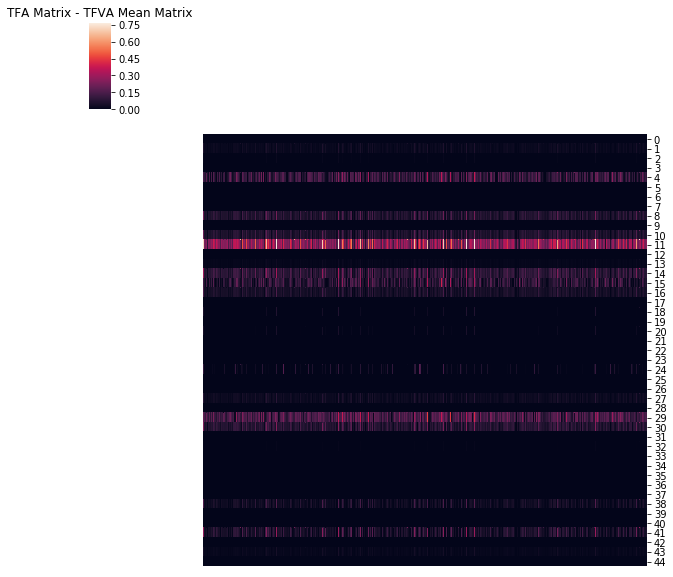

In [4]:
sb.clustermap(matrix,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFA Matrix")
sb.clustermap(TFAVariable,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Mean Matrix")
sb.clustermap(np.abs(np.subtract(matrix,TFAVariable)),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFA Matrix - TFVA Mean Matrix")


NameError: name 'TFAFoldChange' is not defined

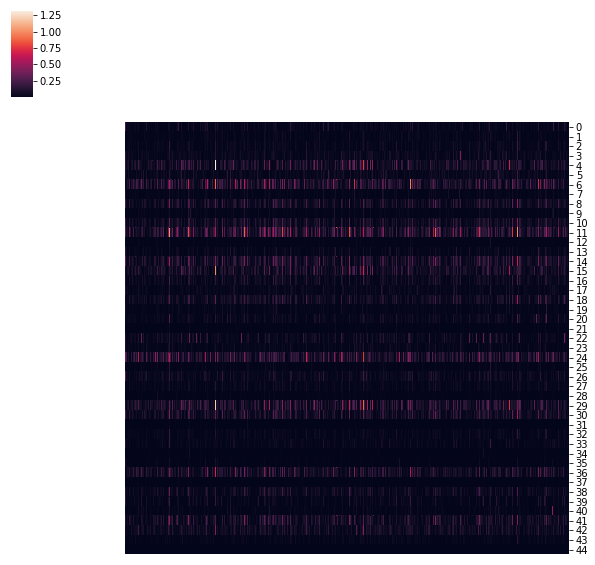

In [5]:
#TFADistance = TFAHelper.distFromWTRange(TFVARange[:-1])
#TFAFoldChange = np.clip([[abs(col/row[-1]-1) for col in row] for row in TFAVariable],.001,None)
TFAFoldChangeOriginal = np.clip([[abs(col/row[-1]-1) for col in row] for row in matrix],.001,None)
sb.clustermap((TFAFoldChangeOriginal),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
sb.clustermap((TFAFoldChange),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Mean Matrix Absolute Fold Change - 1 from WT")
sb.clustermap(TFADistance,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Distance from WT Interval Matrix")
sb.clustermap(TFAHelper.BinDistMatrixV(TFADistance),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("3 = disjoint\n2 = |Intersection| != 0\n 1 = Proper Subset\n 0 = Identical")

Negative = found solution for upper bound and lower bound has a mean error from the true GE better
 than the error from the original factorization


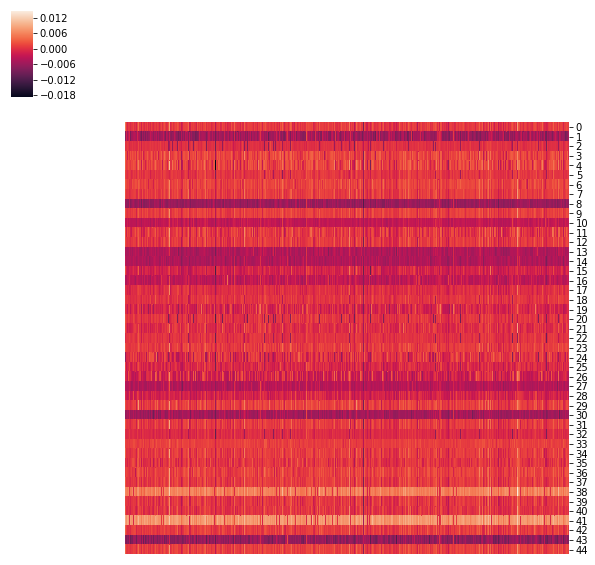

In [6]:
TFVAQuality = [[np.mean(col) for col in row] for row in TFVAQuality]
sb.clustermap(TFVAQuality,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
print("Negative = found solution for upper bound and lower bound has a mean error from the true GE better\n than the error from the original factorization")

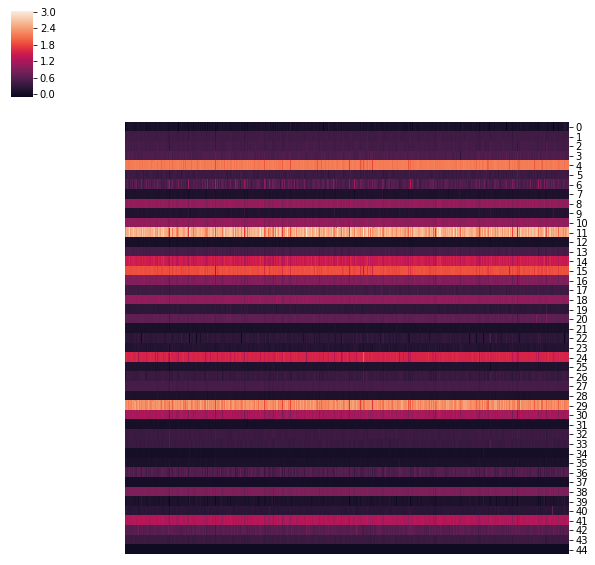

In [6]:
# Look at relative size of TFA Range compared to found TFA value

TFARangeSize = [[(max(col1)-min(col1)/col2) for col1,col2 in zip(row1,row2)] for row1,row2 in zip(TFVARange,TFAVariable)]
sb.clustermap(TFARangeSize,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)

# about 1/4 of the TFs have a range that makes their individual values meaningless